In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

GB1_MAX_FITNESS = 8.76196565571
GB1_Y_LIMITS = [0.0, 8.85]

PHOQ_MAX_FITNESS = 133.59427
PHOQ_Y_LIMITS = [0.0, 70]

Single MLDE run

In [13]:
dataset = "GB1" # Select "GB1" or "PhoQ"
file_path = '../de/data/boes/GB1/01/fitness_progression.pkl' # Define file path

if dataset == "GB1":
    max_fitness = GB1_MAX_FITNESS
    y_limits = GB1_Y_LIMITS
elif dataset == "PhoQ":
    max_fitness = PHOQ_MAX_FITNESS
    y_limits = PHOQ_Y_LIMITS

with open(file_path, "rb") as f:
    fitness_progression = pickle.load(f)[0] * max_fitness

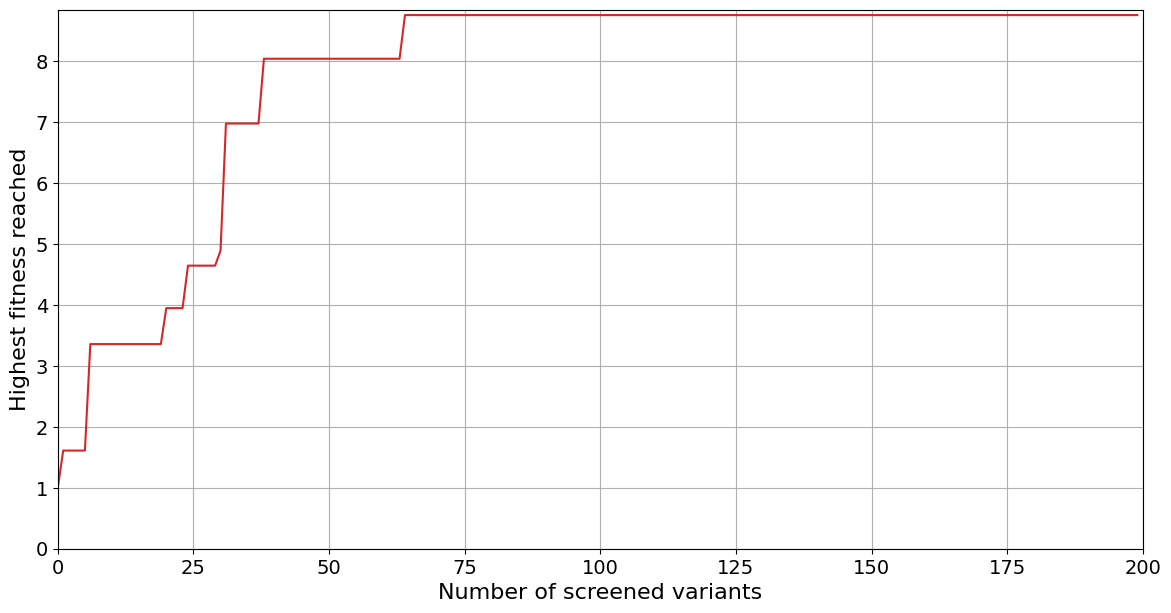

In [14]:
fig, (ax) = plt.subplots(ncols=1, figsize=(14, 7), sharey=True)
ax.plot(np.arange(len(fitness_progression)), fitness_progression, color='tab:red')

default_fontsize = 14
label_fontsize = 16
plt.xlabel("Number of screened variants", fontsize=label_fontsize)
plt.ylabel("Highest fitness reached", fontsize=label_fontsize)
plt.xticks(fontsize=default_fontsize)
plt.yticks(fontsize=default_fontsize)
ax.set_ylim(y_limits)
ax.set_xlim([0, 200])
plt.grid()
plt.show()

Multiple MLDE runs

In [21]:
dataset = "GB1"  # Select "GB1" or "PhoQ"
file_path = "../de/data/boes/GB1/sample/results_200.pkl"  # Define file path

if dataset == "GB1":
    max_fitness = GB1_MAX_FITNESS
    y_limits = GB1_Y_LIMITS
elif dataset == "PhoQ":
    max_fitness = PHOQ_MAX_FITNESS
    y_limits = PHOQ_Y_LIMITS

with open(file_path, "rb") as f:
    fitness_progressions = pickle.load(f)[0] * max_fitness

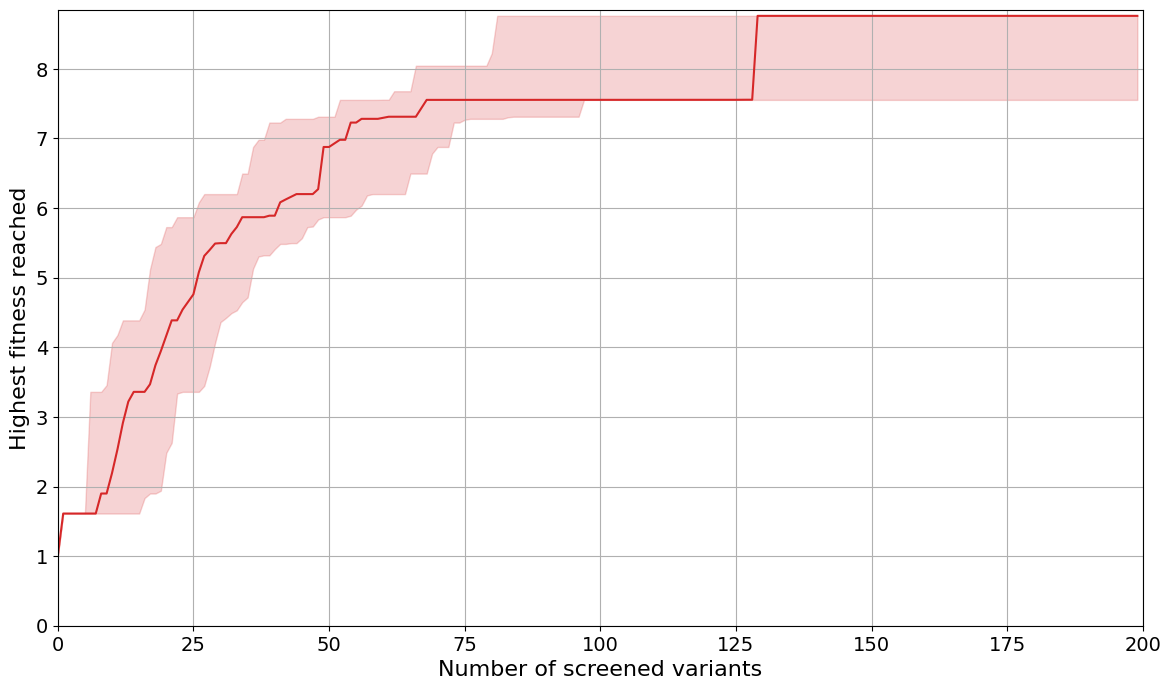

In [22]:
def tsplot(ax, data, **kw):
    x = np.arange(data.shape[1])

    # est = np.mean(data, axis=0)
    est = np.median(data, axis=0)

    # sd = np.std(data, axis=0)
    # cis = (est - sd, est + sd)
    cis = (np.quantile(data, 0.25, axis=0), np.quantile(data, 0.75, axis=0))

    ax.plot(x, est, **kw)
    ax.fill_between(x, cis[0], cis[1], alpha=0.2, **kw)
    ax.margins(x=0)

fig, (ax) = plt.subplots(ncols=1, figsize=(14, 8), sharey=True)
tsplot(ax, fitness_progressions, color='tab:red')

default_fontsize = 14
label_fontsize = 16
plt.xlabel("Number of screened variants", fontsize=label_fontsize)
plt.ylabel("Highest fitness reached", fontsize=label_fontsize)
plt.xticks(fontsize=default_fontsize)
plt.yticks(fontsize=default_fontsize)
ax.set_ylim(y_limits)
ax.set_xlim([0, 200])
plt.grid()
plt.show()